#**Prediction of Heart disease detection**

## Load Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "/content/heart.csv"

In [3]:
training_data = pd.read_csv(file_path)

In [4]:
training_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Preprocess Data

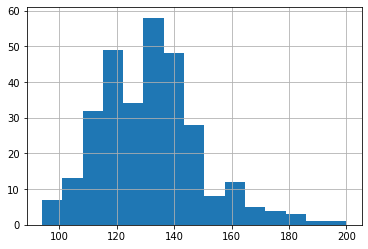

In [5]:
training_data["trestbps"].hist(bins=15)

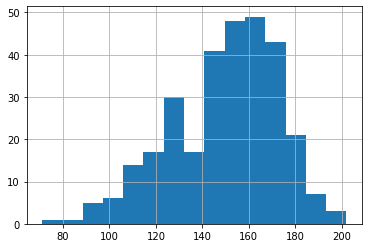

In [6]:
training_data["thalach"].hist(bins=15)

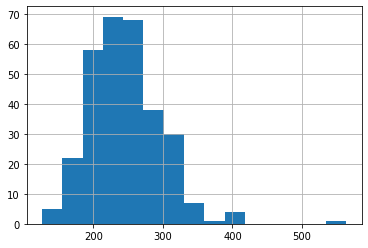

In [7]:
training_data["chol"].hist(bins=15)

In [8]:
training_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
training_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Prepare Data

In [10]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = ["age", "trestbps", "chol", "thalach", "oldpeak"]
training_data[columns_to_scale] = scaler.fit_transform(training_data[columns_to_scale])

In [11]:
training_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [12]:
# divide data into train and test dataset
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(training_data, test_size=0.25, random_state=40) 

In [13]:
train_dataset.shape, test_dataset.shape

((227, 14), (76, 14))

In [14]:
train_input = train_dataset.drop(columns=["target"]).values
train_output = train_dataset["target"].values

test_input = test_dataset.drop(columns=["target"]).values
test_output = test_dataset["target"].values

In [15]:
train_input.shape, train_output.shape

((227, 13), (227,))

## Training

In [16]:
# Training naive bayes classifier model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(train_input, train_output)

GaussianNB()

In [17]:
# Calculate accuracy
from sklearn import metrics
test_predictions = model.predict(test_input)
accuracy = metrics.accuracy_score(test_predictions, test_output)
accuracy    # ~88% accuracy

0.881578947368421

#**Created By - RAHUL BHUVA**